### Leonard Molano  |  Group 6  |   August 8, 2020


### Thera Bank Personal Loan Campaign

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## 1. Load and view basic information about the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
bank_org = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# Dropping ID since all items are already unique
bank = bank_org.drop('ID', axis =1 ) 

In [4]:
bank.shape

(5000, 13)

In [5]:
print('Number of rows in the dataset: ', bank.shape[0])

Number of rows in the dataset:  5000


In [6]:
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
bank.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00


In [10]:
bank.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.00,-0.00,-0.00,0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02


## 2. EDA

#### Number of unique in each column?

In [11]:
bank.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### Number of people with zero mortgage?

In [12]:
zero_mortgage = bank[bank['Mortgage'] == 0]
print("Number of people with zero mortgage: ", zero_mortgage.size)

Number of people with zero mortgage:  45006


#### Number of people with zero credit card spending per month?

In [13]:
zero_cc_spend = bank[bank['CCAvg'] == 0]
print("Number of people with zero credit card spending per month: ", zero_cc_spend.size)

Number of people with zero credit card spending per month:  1378


#### Number of people with personal loans?

In [14]:
yes_loan = bank[bank['Personal Loan'] == 1]
no_loan = bank[bank['Personal Loan'] == 0]

print("Number of people with personal loans: {0} ({1:2.2f}%)".format(yes_loan.size, (yes_loan.size / (yes_loan.size + no_loan.size)) * 100 ))
print("Number of people without personal loans: {0} ({1:2.2f}%)".format(no_loan.size, (no_loan.size / (yes_loan.size + no_loan.size)) * 100))

Number of people with personal loans: 6240 (9.60%)
Number of people without personal loans: 58760 (90.40%)


#### Value counts of all categorical columns

In [15]:
bank['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [16]:
bank['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [17]:
bank['Income'].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [18]:
bank['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [19]:
bank['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
bank['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [21]:
bank['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [22]:
bank['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [23]:
bank['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [24]:
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [25]:
bank['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [26]:
bank['CD Account'].value_counts()      

0    4698
1     302
Name: CD Account, dtype: int64

In [27]:
bank['Online'].value_counts()         

1    2984
0    2016
Name: Online, dtype: int64

In [28]:
bank['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### Replace negative values in 'Experience' with 0

In [29]:
bank.loc[bank['Experience'] < 0] = 0

#### Univariate and Bivariate

In [30]:
bank_continuous = bank[['Age', 'Experience', 'Family', 'CCAvg', 'Mortgage']].copy()

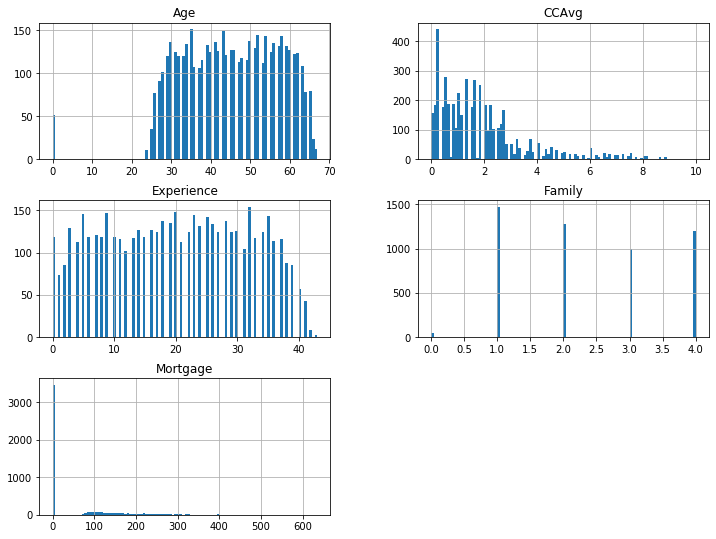

In [31]:
bank_continuous.hist(stacked=False, bins=100, figsize=(12,45), layout=(14,2)); 

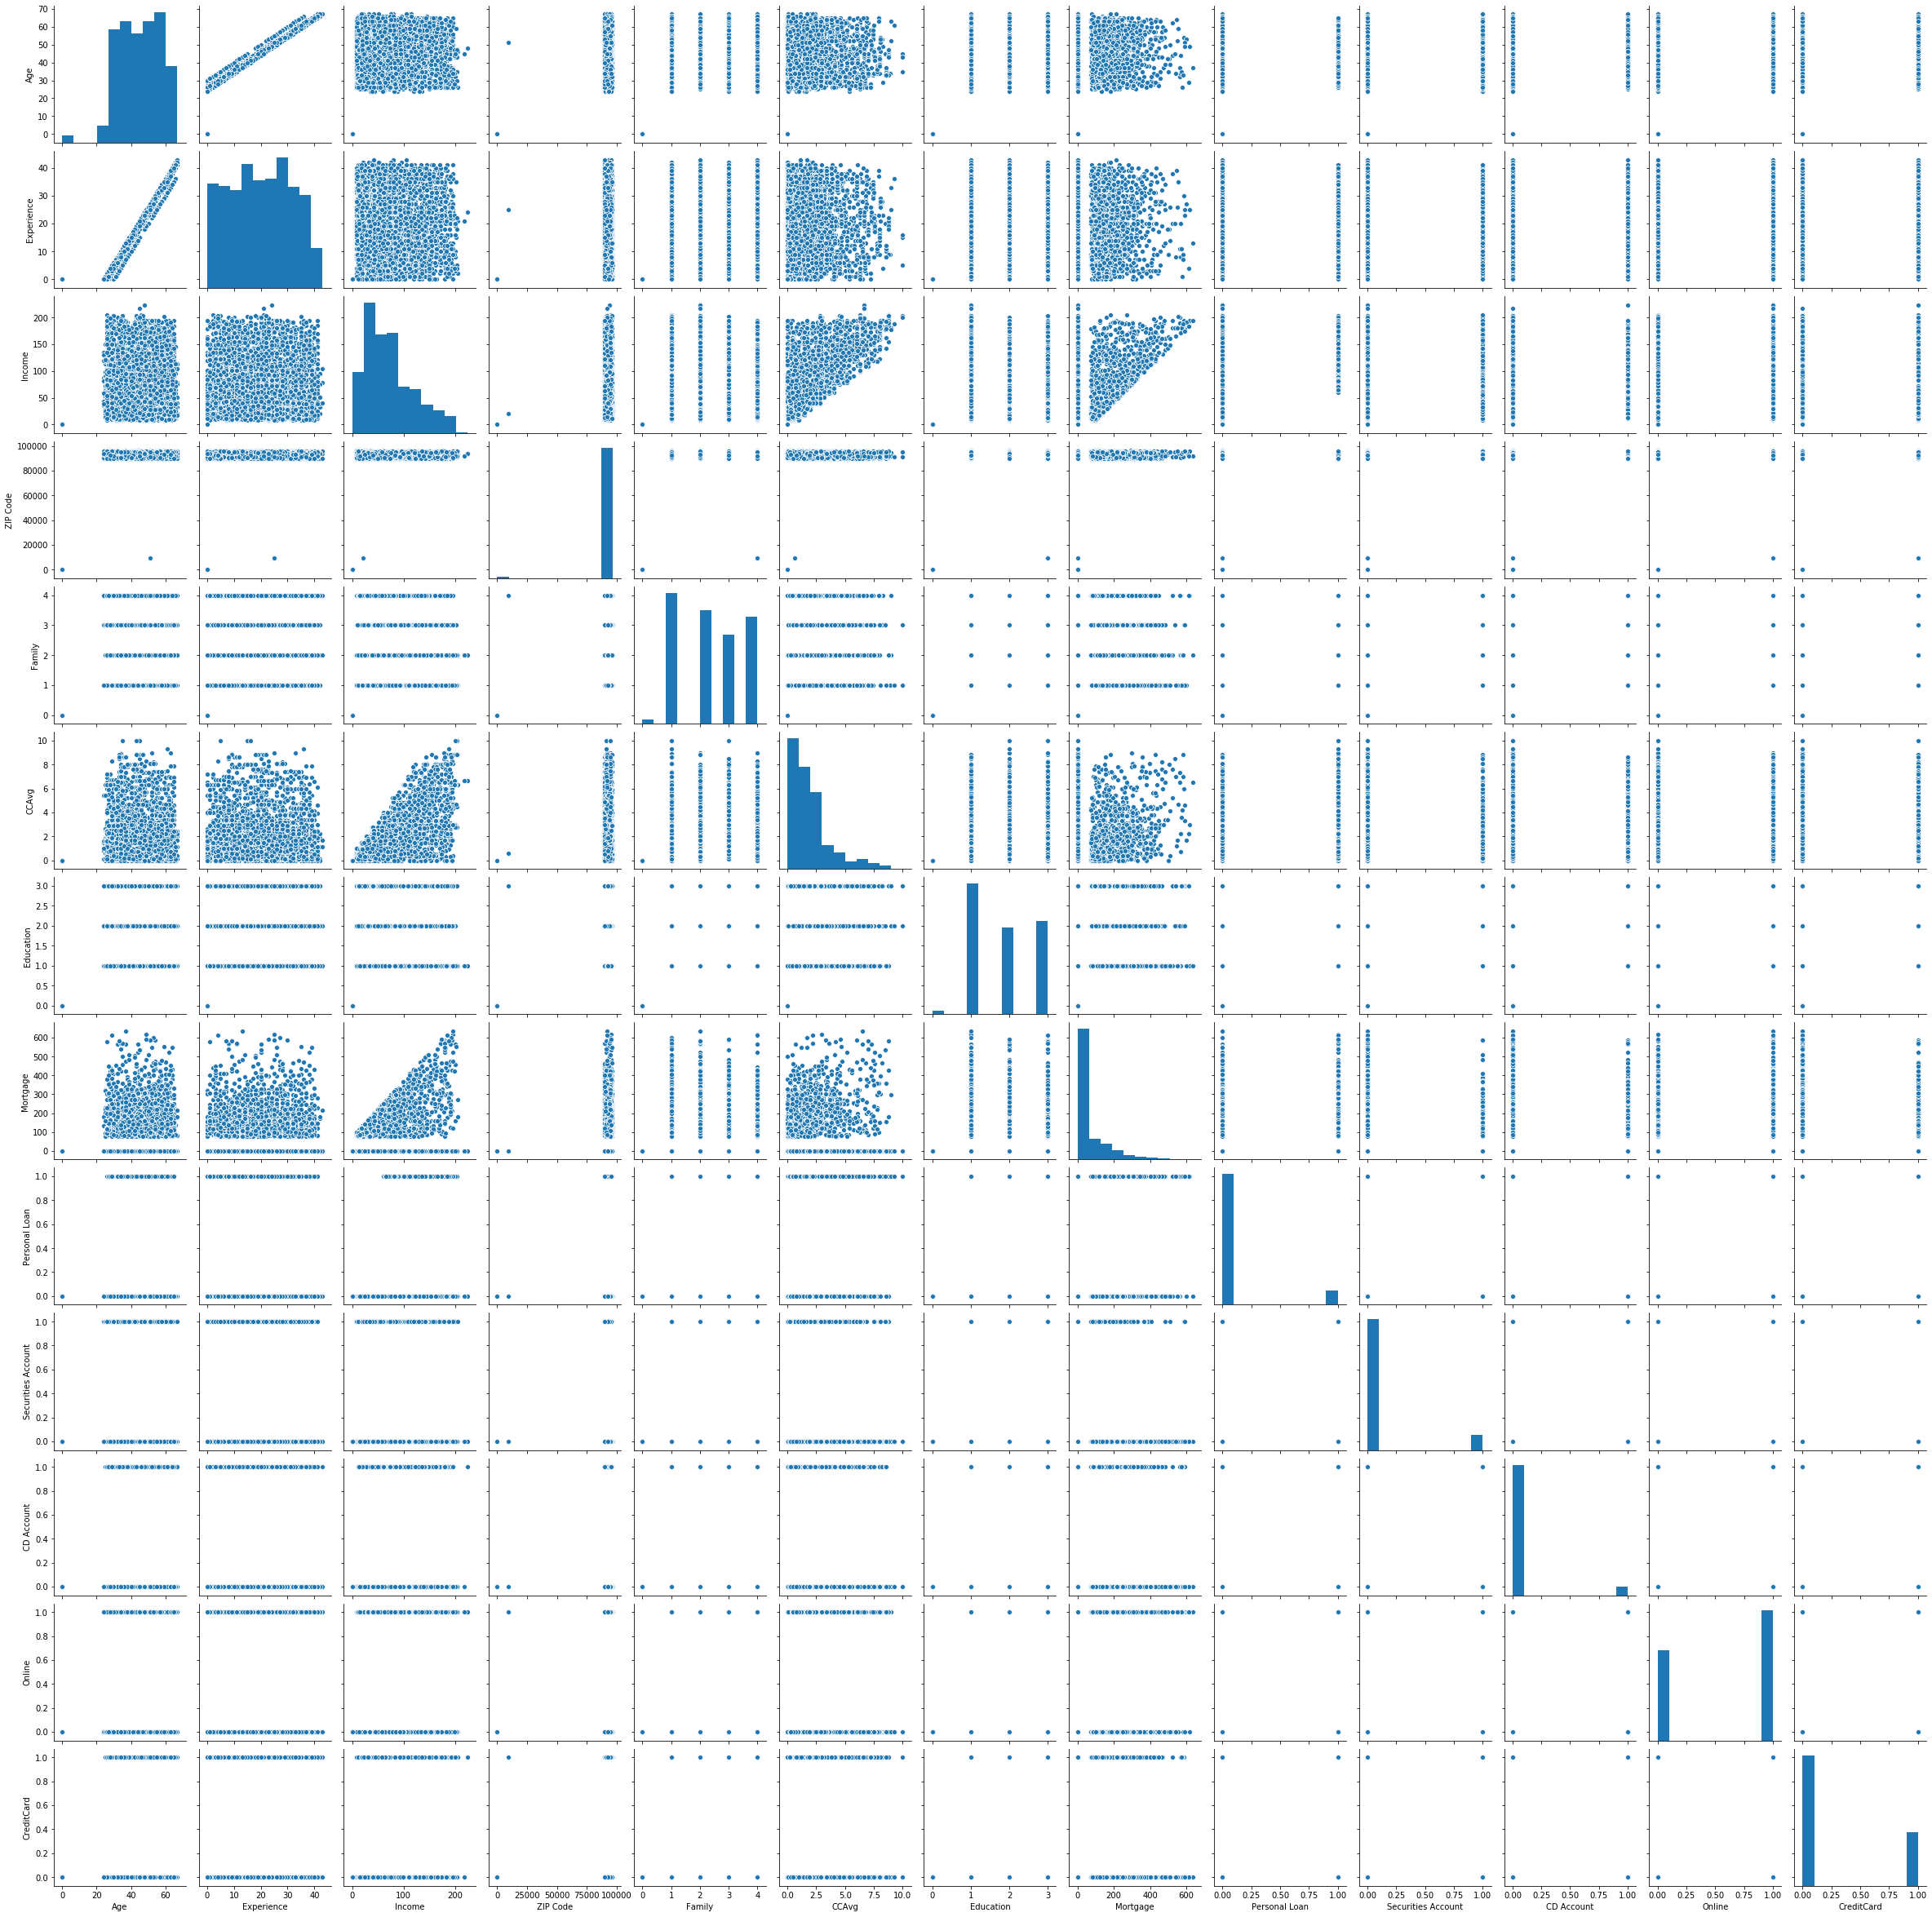

In [32]:
sns.pairplot(bank)

## 3. Create Model
Split the data into training and test set in the ratio of 70:30 respectively

In [39]:
# Prepare variables
bank_dummies = pd.get_dummies(bank, prefix='Edu', columns=['Education'])
X = bank_dummies.drop(['Personal Loan','Edu_3'], axis=1)
Y = bank_dummies[['Personal Loan']]

In [40]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [48]:
# Create the model and prediction
log_model = LogisticRegression(solver="liblinear")
log_model.fit(x_train, np.ravel(y_train))
y_predict = log_model.predict(x_test)

## 4. Predict whether the customer will take personal loan or not
Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance.



In [49]:
# Used to check whether X customer will or will not take out a personal loan
log_model.predict_proba(x_test)

array([[0.93869326, 0.06130674],
       [0.98402201, 0.01597799],
       [0.99171252, 0.00828748],
       ...,
       [0.99382039, 0.00617961],
       [0.99216928, 0.00783072],
       [0.9929168 , 0.0070832 ]])

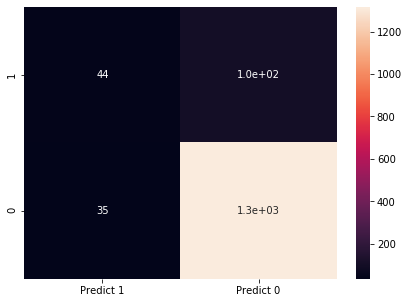

In [50]:
# Create and display decision matrix to visualize results
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [51]:
TP = 44
TN = 1300
FP = 35
FN = 100

class_error_rate = ((FP+FN)/(TP+TN+FP+FN)) * 100
TPR = (TP/(TP+FN)) 
TNR = (TN/(TN+FP))

F1 = ( 2*((TPR * TNR) / (TPR + TNR) ))

print('Classification Error Rate: ', class_error_rate, '%')
print('True Positive Rate: ', TPR * 100, '%')
print('True Negative Rate: ', TNR  * 100, '%')
print('F1 score: ', F1)

Classification Error Rate:  9.127789046653144 %
True Positive Rate:  30.555555555555557 %
True Negative Rate:  97.37827715355806 %
F1 score:  0.46515410262665696


In [52]:
log_model.score(x_train, y_train)

0.9091428571428571

In [53]:
log_model.score(x_test, y_test)

0.9066666666666666

### Model observations 

We have created a logistic regression model with a performance of 46.5%. This is because the data used in the model is heavily skewed towards people who did not already have personal loans, decreasing the performance of identifying the positive outcomes. 

The model also has a statistically significant Rˆ2 of 0.91 for testing and training data, meaning there wasn't much variance in the data in both sets. 

Also when analyzing the original dataset, we saw that there was no field with a high correlation with the Personal Loan field, making the model less efficient.

In summary this model is better used for predicting if a person is likely to NOT take out a loan, but doesn't truly help us in answering the main question.

## 5. How can we make the model better?

Given that the data is heavily skewed to people without personal loans, we don't have many successful cases to base our predictions on. A larger dataset with additional fields would also improve the model. 

## 6. Bussiness understanding of my model

A potential use for this model would be for marketing research, where we can filter out people who are NOT likely to take out a loan. With this we can further filter criterias of people who won't take loans, and modify our data gathering efforts to create a new model in the future. 